・ (MedInc)median income in block-収入の中央値  
・(HouseAge)median house age in block-ブロック内の家の中央年齢  
・(AveRooms)average number of rooms-平均部屋数  
・(AveBedrms)average number of bedrooms-ベッドルームの平均数  
・(Population)block population-ブロック人口  
・(AveOccup)average house occupancy-平均住宅占有率  
・(Latitude)house block latitude-ハウスブロックの緯度  
・(Longitude)house block longitude-ハウスブロックの経度  
・MedHouseVal（median house value）：「住宅価格」（100,000ドル＝10万ドル単位）の中央値。通常はこの数値が目的変数として使われる

## 検証したいこと
・targetのヒストグラムなどを確認し、外れ値がある場合はそれを除去して訓練してみる。ただ、外れ値が多い場合は、現実世界でもその外れ値が存在する可能性が高いと思われるので、ex)外れ値も均等に訓練データや検証データやテストデータに含まれるようにしてみる。層化k分割交差検証のように  
・スケーリングしてモデルを学習させる  
・ホールドアウトとk分割交差検証をしてみて２つの違いを見たい（ハイパラチューニングではない)  
・データの数を1000個くらいに減らす。残りをテストデータとする。trainに過剰適合して、testの評価指標との差異を大きくして、ハイバリアンスの状態を作り出したい。  
・その後バリアンスを小さくする手法（正則化、k分割交差検証とホールドアウトの違いの検証、他モデル、ハイパーパラメータ探索、特徴量選択、特徴量抽出）を試して、違いを探る  
・残差（y_train-y_pred)を計算し、プロット。分布や基本統計量も調べる。

## 結果
特徴量はそのままの時のRMSE：0.726980512661084  
Longitudeを削除： 0.7834347496811289  
Latitudeを削除 ：0.7852698301261432  
⇒相関が高い２変数のうちどちらか一方を減らしてもRMSEが改善するわけではなさそう　では多重共線性の問題点は？

In [88]:
import sklearn.datasets 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.feature_selection import f_regression

In [2]:
data=sklearn.datasets.fetch_california_housing()
feature=data.data
target=data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.7, shuffle=True, random_state=1)

In [4]:
df_train=pd.DataFrame(X_train, columns=data.feature_names)
df_train['target']=y_train
df_test=pd.DataFrame(X_test, columns=data.feature_names)
df_test['target']=y_test

In [5]:
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26,1.71100
1,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75,0.55400
2,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56,0.69600
3,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83,2.13100
4,2.9196,33.0,4.824528,1.090566,1715.0,3.235849,34.09,-118.08,2.08800
...,...,...,...,...,...,...,...,...,...
14442,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
14443,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
14444,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
14445,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


In [6]:
df_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.550
1,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.707
2,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.294
3,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.125
4,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.254
...,...,...,...,...,...,...,...,...,...
6188,3.6429,33.0,6.253731,1.149254,190.0,2.835821,39.65,-122.14,0.875
6189,2.5865,47.0,4.681818,1.041958,794.0,2.776224,38.12,-122.25,1.098
6190,2.6098,13.0,5.042553,1.104533,2957.0,2.735430,38.07,-122.24,1.625
6191,1.7083,29.0,2.898637,1.164395,3432.0,2.923339,34.10,-118.30,1.667


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14447 entries, 0 to 14446
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14447 non-null  float64
 1   HouseAge    14447 non-null  float64
 2   AveRooms    14447 non-null  float64
 3   AveBedrms   14447 non-null  float64
 4   Population  14447 non-null  float64
 5   AveOccup    14447 non-null  float64
 6   Latitude    14447 non-null  float64
 7   Longitude   14447 non-null  float64
 8   target      14447 non-null  float64
dtypes: float64(9)
memory usage: 1015.9 KB


## EDA

In [8]:
df_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000,14447.000000
mean,3.872355,28.567246,5.434850,1.097764,1428.768049,3.123288,35.629552,-119.570905,2.076510
std,1.888058,12.578846,2.569482,0.501881,1130.599519,12.394618,2.135576,2.006880,1.157042
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.300000,0.149990
25%,2.568200,18.000000,4.441016,1.006173,788.000000,2.429271,33.930000,-121.810000,1.202000
50%,3.537900,29.000000,5.230366,1.048966,1164.000000,2.817259,34.250000,-118.490000,1.801000
75%,4.740300,37.000000,6.062470,1.099678,1723.000000,3.274941,37.710000,-118.010000,2.659000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df_train.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [10]:
#sns.pairplot(data=df_train)

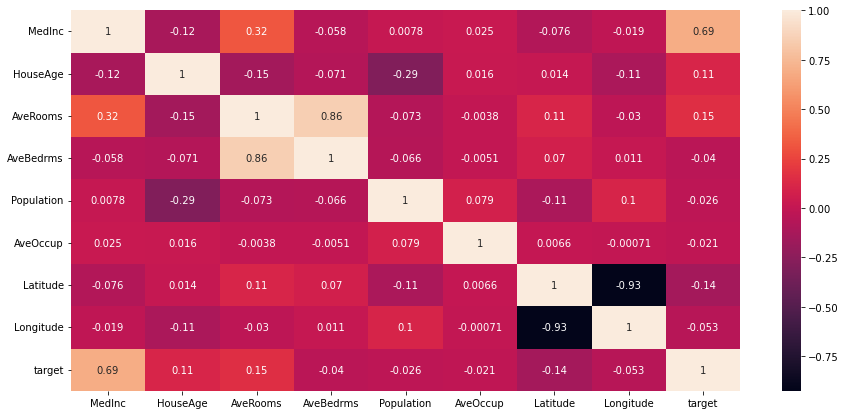

In [11]:
plt.figure(figsize=(15,7))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [12]:
df_train['AveOccup'].describe()

count    14447.000000
mean         3.123288
std         12.394618
min          0.750000
25%          2.429271
50%          2.817259
75%          3.274941
max       1243.333333
Name: AveOccup, dtype: float64

(0.0, 10.0)

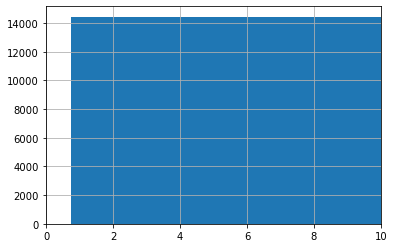

In [13]:
#ヒストグラムを作るとこんなんなってしまう
df_train['AveOccup'].hist()
plt.xlim(0,10)

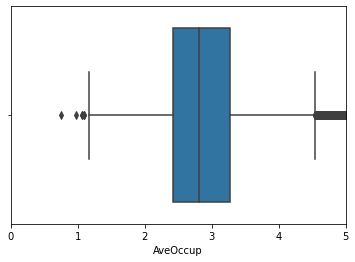

In [14]:
#'AveOccup'をヒストグラムをプロットするとかなり時間がかかる、
#そんな時はボックスプロット
sns.boxplot(x='AveOccup', data=df_train)
plt.xlim(0, 5)
plt.show()

<AxesSubplot:xlabel='Population', ylabel='Count'>

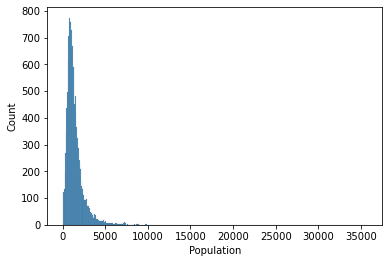

In [15]:
sns.histplot(x='Population', data=df_train)

(0.0, 5000.0)

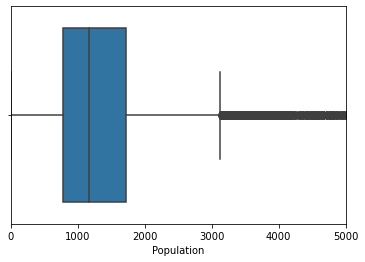

In [16]:
sns.boxplot(x='Population', data=df_train)
plt.xlim(0, 5000)

<AxesSubplot:xlabel='Population'>

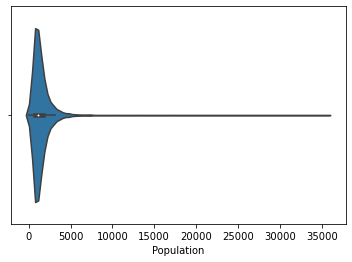

In [17]:
#バイオリンプロットでもデータの様相を確認できる
sns.violinplot(x='Population', data=df_train)

<AxesSubplot:xlabel='AveOccup'>

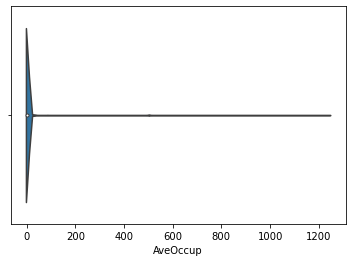

In [18]:
sns.violinplot(x='AveOccup', data=df_train)

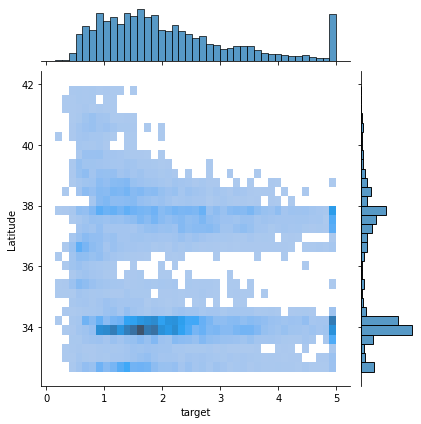

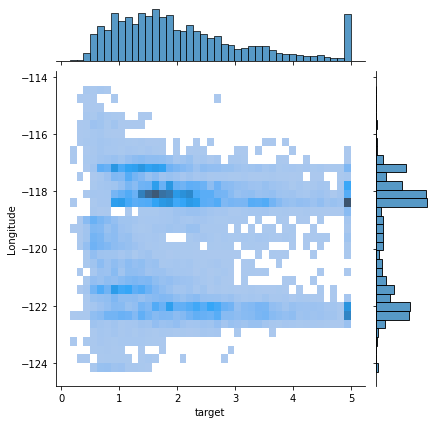

In [19]:
sns.jointplot(x='target', y='Latitude', data=df_train, kind='hist')
sns.jointplot(x='target', y='Longitude', data=df_train, kind='hist')
plt.show()

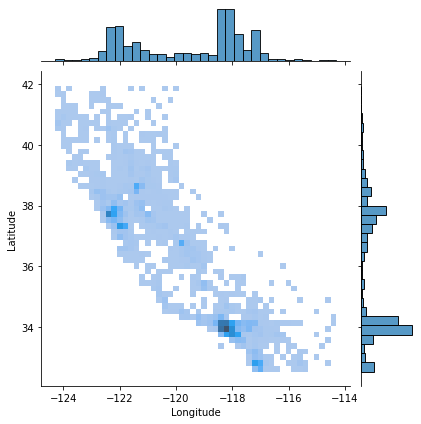

In [20]:
#サンフランシスコ、ロスあたりのデータがそもそも多い
sns.jointplot(x='Longitude', y='Latitude', data=df_train, kind='hist',bins=50)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

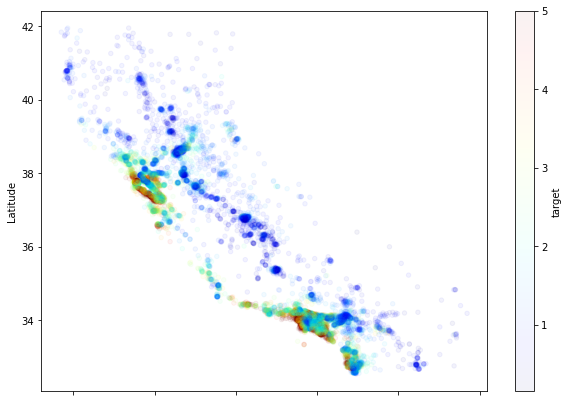

In [21]:
#縦軸＝緯度、横軸＝経度、色＝住宅価格
df_train.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.05, c='target', cmap=plt.get_cmap('jet'), figsize=(10,7))

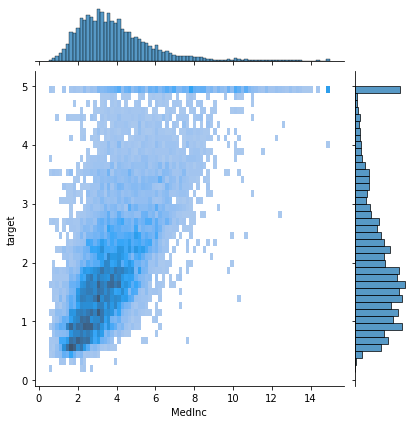

In [22]:
sns.jointplot(x='MedInc', y='target',data=df_train, kind='hist')

# モデル構築

## ①ベンチマークモデル作成　線形回帰、LightGBM、決定木、ランフォレ

#### 線形回帰

In [23]:
#特徴量エンジニアリング
x_train_line = df_train.loc[:,'MedInc':'Longitude']
y_train_line = df_train['target']
x_train_line

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26
1,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75
2,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56
3,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83
4,2.9196,33.0,4.824528,1.090566,1715.0,3.235849,34.09,-118.08
...,...,...,...,...,...,...,...,...
14442,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
14443,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
14444,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
14445,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [24]:
LR=LinearRegression()
LR.fit(x_train_line, y_train_line)
pre_lin=LR.predict(x_train_line)

In [25]:
pre_lin=pd.DataFrame(pre_lin, columns=['price_pred'])
pre_lin

,price_pred
0,2.170150
1,1.255071
2,0.795392
3,2.462278
4,1.755361
...,...
14442,1.235354
14443,4.621358
14444,1.149223
14445,1.055113


In [26]:
print(LR.intercept_)
print(LR.coef_)

-37.284575109861564
[ 4.41039414e-01  9.69156499e-03 -1.04748065e-01  6.21897419e-01
 -5.66545297e-06 -3.28751453e-03 -4.23159711e-01 -4.37885032e-01]


In [27]:
#決定係数
r2_score(y_train_line,  pre_lin)

0.6097372488516284

In [28]:
lr=LinearRegression()
lr.fit(X_train,y_train)
i = lr.predict(X_train)
i

array([2.17014971, 1.25507092, 0.79539218, ..., 1.14922253, 1.05511297,
       1.82266727])

In [29]:
r2_score(y_train, i)

0.6097372488516284

In [30]:
#MAE
mean_absolute_error(y_train_line, pre_lin)

0.5308619236755425

In [31]:
#MSE,RMSE
#mean_squared_errorの引数squered=FalseにすることでRMSEを計算
print(mean_squared_error(y_train_line, pre_lin))
print(mean_squared_error(y_train_line, pre_lin, squared=False))

0.5224264722480978
0.7227907527411359


In [32]:
#RMSEはこれでも計算可能
np.sqrt(mean_squared_error(y_train_line, pre_lin))

0.7227907527411359

## MAEよりRMSEの方が大きくなっている
評価指標について：https://datawokagaku.com/reg_metrics/

In [33]:
#テストデータに突っ込む
X_test_lin=df_test.loc[:,'MedInc':'Longitude']
y_test_lin=df_test['target']
y_test_pred=LR.predict(X_test_lin)
y_test_pred

array([2.12594131, 0.94105584, 2.7104278 , ..., 1.5427789 , 1.51341441,
       1.69167071])

In [34]:
#決定係数
print('決定係数', r2_score(y_test_lin, y_test_pred))
print('MAE', mean_absolute_error(y_test_lin, y_test_pred))
print('RMSE', mean_squared_error(y_test_lin, y_test_pred, squared=False))

決定係数 0.5970870916688176
MAE 0.5352673125242643
RMSE 0.7277531445572314


## 結果　trainとtestの決定係数、MAE,RMSEはほぼ同じ
next 決定係数,mae,rmseの指標を向上させるにはなにが必要？データは変えずに  
過学習しているかどうかはどうやってチェックする？バイアス・バリアンス分解？

In [35]:
#標準化
ss=StandardScaler()
ss.fit_transform(x_train_line)
x_train_std = pd.DataFrame(ss.fit_transform(x_train_line), columns=x_train_line.columns)
x_train_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.367827,0.988420,-0.404809,-0.085560,0.202760,0.041364,-0.856732,0.653228
1,-0.721007,1.624431,-0.213302,-0.265816,-0.122743,-0.033797,0.524677,-0.089244
2,-0.705434,-1.078614,0.393012,0.646713,1.007670,-0.059258,-0.734981,1.500343
3,0.334188,-1.714624,-0.055679,0.006793,0.274405,-0.046266,0.763496,-1.125714
4,-0.504639,0.352410,-0.237535,-0.014342,0.253177,0.009082,-0.720932,0.742922
...,...,...,...,...,...,...,...,...
14442,-1.107025,-0.919611,-0.537015,-0.021137,-0.309376,-0.052324,-0.875463,0.842583
14443,2.483296,1.067921,0.526822,-0.171810,-0.597728,-0.018326,-0.566402,-0.029447
14444,-1.451147,1.067921,-0.211748,-0.181201,-0.578269,-0.038586,-0.795856,0.653228
14445,-0.656864,-1.476120,-0.172506,-0.290880,-0.093554,-0.028215,-0.889511,1.201361


In [36]:
#テストデータも標準化
ss2=StandardScaler()
x_test_std=pd.DataFrame(ss2.fit_transform(X_test_lin), columns=X_test_lin.columns)
x_test_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.320057,0.808914,-0.407927,-0.050898,-0.271649,-1.108472,-0.738128,0.604754
1,-0.979951,0.650179,-0.190858,-0.137912,-0.241739,-0.320322,0.534790,-0.106777
2,0.076004,1.364488,-0.418172,-0.203966,0.102222,0.786357,0.979376,-1.429624
3,-1.217421,1.840694,-0.674091,0.051869,-1.071291,-0.614561,1.016815,-1.359473
4,0.681253,0.650179,-0.004022,-0.173006,-0.621767,-0.412381,-0.850445,0.720002
...,...,...,...,...,...,...,...,...
6188,-0.116162,0.332709,0.374936,0.137403,-1.080088,-0.106102,1.877907,-1.289322
6189,-0.664379,1.443856,-0.328048,-0.130071,-0.548753,-0.162535,1.161890,-1.344441
6190,-0.652287,-1.254645,-0.166722,0.025920,1.354027,-0.201163,1.138491,-1.339430
6191,-1.120118,0.015238,-1.125514,0.175148,1.771882,-0.023231,-0.719409,0.634818


In [37]:
#学習
LR2=LinearRegression()
LR2.fit(x_train_std, y_train_line)

LinearRegression()

In [38]:
#train予測
y_train_pred_std = LR2.predict(x_train_std)
y_test_pred_std = LR2.predict(x_test_std)
print('y_train_pred',y_train_pred_std)
print('y_test_pred',y_test_pred_std)

y_train_pred [2.17014971 1.25507092 0.79539218 ... 1.14922253 1.05511297 1.82266727]
y_test_pred [2.1850119  0.9732727  2.69359001 ... 1.58112298 1.58510216 1.73003974]


In [39]:
#testのr2,mae,RMSE
print('決定係数', r2_score(y_test_lin, y_test_pred_std))
print('MAE', mean_absolute_error(y_test_lin, y_test_pred_std))
print('RMSE', mean_squared_error(y_test_lin, y_test_pred_std, squared=False))

決定係数 0.6069975556579771
MAE 0.5290302234596493
RMSE 0.7187471336982793


### 標準化したほうが若干指標が改善した

In [40]:
#単回帰分析 x='AveOccup'
LR3=LinearRegression()
LR3.fit(df_train['AveOccup'].values.reshape(-1,1), y_train_line)
o=LR3.predict(df_test['AveOccup'].values.reshape(-1,1))
o

array([2.07918034, 2.07752909, 2.0752105 , ..., 2.07727944, 2.07690666,
       2.07736408])

In [41]:
mean_squared_error(y_test_lin,o, squared=False)

1.1464119716856649

当たり前だがRMSEは全特徴量突っ込みよりも大きくなる

In [42]:
y_test_lin.describe()

count    6193.000000
mean        2.050008
std         1.146604
min         0.149990
25%         1.188000
50%         1.790000
75%         2.625000
max         5.000010
Name: target, dtype: float64

## データ数を1000件に

In [43]:
#元データをランダムにして再度作り直し
df2=pd.concat([df_train, df_test], axis=0).sample(frac=1, random_state=0).reset_index().drop('index', axis=1)
#1000件データを抽出
df3=df2.iloc[0:1000,:]
df3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.1797,26.0,5.617284,1.154321,1001.0,3.089506,33.16,-116.68,1.563
1,4.5461,16.0,7.723288,1.312329,1068.0,2.926027,35.10,-120.30,2.708
2,3.6587,32.0,5.524038,0.899038,499.0,2.399038,39.16,-123.22,1.546
3,4.8583,28.0,5.983333,0.970370,1665.0,3.083333,34.28,-119.19,2.242
4,3.6591,36.0,5.207739,1.099796,1556.0,3.169043,34.22,-118.40,1.838
...,...,...,...,...,...,...,...,...,...
995,1.2292,52.0,2.340136,1.204082,460.0,3.129252,32.72,-117.15,1.375
996,2.8281,33.0,4.204762,1.004762,1007.0,4.795238,34.05,-117.62,1.036
997,2.6218,49.0,4.291246,1.060606,1539.0,2.590909,34.08,-118.31,3.509
998,4.1321,32.0,4.975113,1.023756,2777.0,3.141403,33.77,-117.96,2.228


## まずはバリアンスが大きいか確認

In [44]:
#1000件のデータでモデル作成、残りのデータで予測値を出す。
LR4=LinearRegression()
LR4.fit(df3.loc[:,'MedInc':'Longitude'],  
        df3['target'])
df2_train_pred=LR4.predict(df3.loc[:,'MedInc':'Longitude'])
df2_test_pred=LR4.predict(df2.loc[1000:,'MedInc':'Longitude'])

In [45]:
#train,testのRMSEをそれぞれ出力
print('train1000データ',mean_squared_error(df3['target'], df2_train_pred, squared=False))
print('Test残りデータ',mean_squared_error(df2.loc[1000:,'target'], df2_test_pred, squared=False))

train1000データ 0.6853345715348067
Test残りデータ 3.9548000184646077


### データ数を1000件に減らすとtrainとtestのRMSEの差が広がった！  
### ⇒データ数を減らしてモデルを作成するとバリアンスが高くなる！未知データに対するRMSEが上昇する
### ⇒1000データに過剰適合するため汎化性能が落ちる

## Q:ホールドアウト法とk分割交差検証(k=10, LOOそれぞれ)ではバリアンスに違いはある？  
データは1000件のまま  
仮説：ホールドアウトよりもk分割交差検証の方が汎化性能が高い（バリアンスが低い）？ただ、その差は小さそう

### ホールドアウト法

In [46]:
df3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.1797,26.0,5.617284,1.154321,1001.0,3.089506,33.16,-116.68,1.563
1,4.5461,16.0,7.723288,1.312329,1068.0,2.926027,35.10,-120.30,2.708
2,3.6587,32.0,5.524038,0.899038,499.0,2.399038,39.16,-123.22,1.546
3,4.8583,28.0,5.983333,0.970370,1665.0,3.083333,34.28,-119.19,2.242
4,3.6591,36.0,5.207739,1.099796,1556.0,3.169043,34.22,-118.40,1.838
...,...,...,...,...,...,...,...,...,...
995,1.2292,52.0,2.340136,1.204082,460.0,3.129252,32.72,-117.15,1.375
996,2.8281,33.0,4.204762,1.004762,1007.0,4.795238,34.05,-117.62,1.036
997,2.6218,49.0,4.291246,1.060606,1539.0,2.590909,34.08,-118.31,3.509
998,4.1321,32.0,4.975113,1.023756,2777.0,3.141403,33.77,-117.96,2.228


train_test_splitした後に標準化  
後がいいか前がいいか

In [47]:
#df3(1000件データ)をtrain_test_split 0.7
x_train_hold,x_test_hold,y_train_hold,y_test_hold = train_test_split(
            df3.loc[:,'MedInc':'Longitude'], df3['target'], train_size=0.7, shuffle=False)
display(x_train_hold)
display(y_train_hold)
display(x_test_hold)
display(y_test_hold)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.1797,26.0,5.617284,1.154321,1001.0,3.089506,33.16,-116.68
1,4.5461,16.0,7.723288,1.312329,1068.0,2.926027,35.10,-120.30
2,3.6587,32.0,5.524038,0.899038,499.0,2.399038,39.16,-123.22
3,4.8583,28.0,5.983333,0.970370,1665.0,3.083333,34.28,-119.19
4,3.6591,36.0,5.207739,1.099796,1556.0,3.169043,34.22,-118.40
...,...,...,...,...,...,...,...,...
695,5.5418,36.0,5.847458,0.953995,1215.0,2.941889,34.17,-118.07
696,6.2030,38.0,6.264317,1.024229,2263.0,2.492291,37.74,-122.45
697,5.5413,26.0,6.568421,1.071053,1062.0,2.794737,32.81,-117.21
698,1.2745,15.0,2.738693,0.926298,1347.0,2.256281,32.67,-117.10


0      1.563
1      2.708
2      1.546
3      2.242
4      1.838
       ...  
695    3.261
696    3.468
697    3.021
698    0.929
699    1.389
Name: target, Length: 700, dtype: float64

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
700,7.4542,16.0,6.483333,1.066667,512.0,1.706667,37.42,-122.23
701,4.6625,14.0,5.554007,1.017422,887.0,3.090592,37.58,-121.47
702,4.7464,28.0,4.714286,0.925170,901.0,3.064626,33.76,-117.97
703,2.7125,35.0,4.443038,1.109705,552.0,2.329114,36.98,-122.02
704,1.5227,39.0,4.205882,1.084967,1386.0,4.529412,36.75,-119.77
...,...,...,...,...,...,...,...,...
995,1.2292,52.0,2.340136,1.204082,460.0,3.129252,32.72,-117.15
996,2.8281,33.0,4.204762,1.004762,1007.0,4.795238,34.05,-117.62
997,2.6218,49.0,4.291246,1.060606,1539.0,2.590909,34.08,-118.31
998,4.1321,32.0,4.975113,1.023756,2777.0,3.141403,33.77,-117.96


700    5.00001
701    2.94000
702    1.87500
703    2.17500
704    0.46900
        ...   
995    1.37500
996    1.03600
997    3.50900
998    2.22800
999    3.50000
Name: target, Length: 300, dtype: float64

In [48]:
#標準化
ss_hold=StandardScaler()
x_train_hold_std=pd.DataFrame(ss_hold.fit_transform(x_train_hold), columns=x_train_hold.columns)
display(x_train_hold_std)
ss_hold2=StandardScaler()
x_test_hold_std = pd.DataFrame(ss_hold2.fit_transform(x_test_hold), columns=x_test_hold.columns)
x_test_hold_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.852203,-0.312243,0.047643,0.111316,-0.386164,0.154795,-1.142885,1.455212
1,0.323700,-1.100452,0.903505,0.507709,-0.313517,-0.043952,-0.230512,-0.390877
2,-0.117264,0.160682,0.009749,-0.529110,-0.930476,-0.684629,1.678887,-1.879988
3,0.478837,-0.154601,0.196403,-0.350160,0.333802,0.147290,-0.616154,0.175189
4,-0.117065,0.475965,-0.118792,-0.025470,0.215615,0.251490,-0.644372,0.578065
...,...,...,...,...,...,...,...,...
695,0.818479,0.475965,0.141184,-0.391240,-0.154127,-0.024669,-0.667886,0.746355
696,1.147040,0.633607,0.310592,-0.215045,0.982205,-0.571259,1.011068,-1.487311
697,0.818231,-0.312243,0.434177,-0.097579,-0.320022,-0.203566,-1.307488,1.184929
698,-1.302012,-1.179272,-1.122191,-0.460723,-0.011001,-0.858184,-1.373329,1.241025


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.934024,-0.974375,0.501054,-0.078040,-0.771005,-1.607803,0.951777,-1.386742
1,0.430613,-1.130566,0.099190,-0.186444,-0.471175,0.194063,1.032798,-0.994234
2,0.475796,-0.037226,-0.263927,-0.389518,-0.459981,0.160255,-0.901578,0.813370
3,-0.619518,0.509445,-0.381221,0.016700,-0.739023,-0.797379,0.728969,-1.278286
4,-1.260259,0.821828,-0.483773,-0.037755,-0.072202,2.067401,0.612502,-0.116255
...,...,...,...,...,...,...,...,...
295,-1.418318,1.837072,-1.290569,0.224452,-0.812581,0.244397,-1.428214,1.236866
296,-0.557264,0.353253,-0.484258,-0.214311,-0.375230,2.413506,-0.754727,0.994130
297,-0.668362,1.602785,-0.446860,-0.091381,0.050129,-0.456523,-0.739536,0.637774
298,0.144978,0.275157,-0.151138,-0.172500,1.039967,0.260218,-0.896514,0.818535


In [49]:
LR_hold=LinearRegression()
LR_hold.fit(x_train_hold_std, y_train_hold)
y_train_pred_hold=LR_hold.predict(x_train_hold_std)
y_test_pred_hold = LR_hold.predict(x_test_hold_std)

In [50]:
print('RMSE_train', mean_squared_error(y_train_hold,y_train_pred_hold, squared=False))
print('RMSE_test', mean_squared_error(y_test_hold, y_test_pred_hold, squared=False))

RMSE_train 0.6728207052889676
RMSE_test 0.7171482763004988


In [51]:
#x_Testを標準化
ss_Test_hold = StandardScaler()
x_Test_hold_std =pd.DataFrame(ss_Test_hold.fit_transform(df2.loc[1000:,'MedInc':'Longitude']), columns=df2.loc[1000:,'MedInc':'Longitude'].columns)

In [52]:
x_Test_hold_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.397824,-1.160564,0.307931,-0.058233,0.055278,-0.066476,-1.012244,0.927913
1,2.128359,0.747885,0.452130,-0.067538,-0.289420,-0.053511,-0.811174,0.583941
2,-0.590595,-0.365377,-0.766664,-0.006242,0.523962,-0.043157,-0.801822,0.608866
3,-0.638531,-0.206340,0.725306,0.180604,-0.690395,-0.033456,0.914285,-0.672304
4,-0.440354,0.509329,-0.814308,-0.222821,0.086934,-0.108231,-0.722329,0.608866
...,...,...,...,...,...,...,...,...
19635,-0.420314,0.668366,-0.012746,-0.105958,-0.492545,-0.003230,-1.409707,1.236989
19636,-0.313737,0.827404,-0.101742,0.005188,-0.334266,0.057314,-0.666217,0.608866
19637,-0.490294,0.350291,0.049479,-0.051430,0.029778,0.049873,-0.156528,0.289820
19638,0.694974,-1.478639,0.553506,-0.251847,-0.677205,0.006298,1.124707,-0.876693


x_Test_hold_stdはk分割でもTestデータとして使う

In [53]:
df2.loc[1000:,'MedInc':'Longitude']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1000,6.5206,14.0,6.190779,1.068362,1490.0,2.368839,33.47,-117.71
1001,7.9059,38.0,6.547945,1.063927,1098.0,2.506849,33.90,-118.40
1002,2.7500,24.0,3.529107,1.093144,2023.0,2.617076,33.92,-118.35
1003,2.6591,26.0,7.224576,1.182203,642.0,2.720339,37.59,-120.92
1004,3.0349,35.0,3.411097,0.989912,1526.0,1.924338,34.09,-118.35
...,...,...,...,...,...,...,...,...
20635,3.0729,37.0,5.396491,1.045614,867.0,3.042105,32.62,-117.09
20636,3.2750,39.0,5.176056,1.098592,1047.0,3.686620,34.21,-118.35
20637,2.9402,33.0,5.550617,1.071605,1461.0,3.607407,35.30,-118.99
20638,5.1878,10.0,6.799043,0.976077,657.0,3.143541,38.04,-121.33


In [54]:
#Test(未知データ)を予測
y_Test_pred_hold = LR_hold.predict(x_Test_hold_std)
print('RMSE_Test', mean_squared_error(df2.loc[1000:,'target'], y_Test_pred_hold, squared=False))

RMSE_Test 0.7869856511524669


RMSE_test=0.7171482763004988  
RMSE_Test=0.7869856511524669  
⇒RMSE_train<RMSE_test<RMSE_Test  
まだ少しRMSEに差がある

### k分割交差検証（k＝10, LOO)

In [55]:
#df3を標準化
ss_k=StandardScaler()
x_train_k_std = pd.DataFrame(ss_k.fit_transform(df3.loc[:,'MedInc':'Longitude']), columns=df3.loc[:,'MedInc':'Longitude'].columns)
x_train_k_std

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.866981,-0.275967,0.070234,0.112281,-0.379271,0.165523,-1.159970,1.462435
1,0.336004,-1.060858,0.941013,0.492006,-0.314429,-0.037143,-0.228240,-0.390602
2,-0.115116,0.194967,0.031679,-0.501216,-0.865103,-0.690455,1.721669,-1.885316
3,0.494714,-0.118989,0.221586,-0.329791,0.263343,0.157870,-0.622064,0.177595
4,-0.114912,0.508923,-0.099103,-0.018753,0.157854,0.264125,-0.650881,0.581987
...,...,...,...,...,...,...,...,...
995,-1.350179,1.764747,-1.284784,0.231866,-0.902847,0.214796,-1.371290,1.221847
996,-0.537360,0.273456,-0.513808,-0.247141,-0.373464,2.280131,-0.732527,0.981260
997,-0.642235,1.529280,-0.478049,-0.112936,0.141401,-0.452591,-0.718119,0.628056
998,0.125542,0.194967,-0.195288,-0.201495,1.339528,0.229859,-0.867003,0.807217


In [56]:
#from sklearn.model_selection import cross_val_score
LR_k=LinearRegression()
scores=cross_val_score(LR_k, x_train_k_std, df3['target'], scoring='neg_mean_squared_error', cv=10)
#10回分の結果を出す
np.sqrt(-scores)
#平均してtestのスコア（RMSE）を出す
print('RMSE_test',np.mean(np.sqrt(-scores)))

RMSE_test 0.692195788648241


ホールドアウトのRMSE_test(0.7171482763004988)より少し良い数値。問題はTestデータに対してどれくらいの数値を出すか

In [57]:
#まずはもう一度LR_kに対してx_train_k_stdとdf3['target']を学習させて真のモデルを作成
LR_k.fit(x_train_k_std, df3['target'])
y_Test_pred_k = LR_k.predict(x_Test_hold_std)
print('RMSE_Test', mean_squared_error(df2.loc[1000:,'target'], y_Test_pred_k, squared=False))

RMSE_Test 0.7774242130846203


ホールドアウトと同様にRMSE_test<RMSE_Testになった(バリアンスの高さはありそう)が若干RMSEが10分割のほうが下がった。

## 決定木回帰（多変量）  
・元データからMedInc,HouseAgeを特徴量とし、目的変数をtargetとする(件数は５件)  
・手計算  
・決定木回帰を行い計算のプロセスを確認  
・変数重要度を手計算、feature_importance_と同じか確認  
特徴量重要度の計算式は以下参照  
https://yolo-kiyoshi.com/2019/09/16/post-1226/  
$I(j)=\sum(N_{parent}(i) \times MSE_{parent}(i)-(N_{leftchild}(i) \times MSE_{leftchild}(i)+N_{rightchild}(i) \times MSE_{rightchild}(i))$  

In [58]:
df_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,3.1779,41.0,4.394737,1.054825,1658.0,3.635965,33.80,-118.26,1.71100
1,2.5111,49.0,4.886792,0.964361,1290.0,2.704403,36.75,-119.75,0.55400
2,2.5405,15.0,6.444651,1.422326,2568.0,2.388837,34.06,-116.56,0.69600
3,4.5033,7.0,5.291789,1.101173,1739.0,2.549853,37.26,-121.83,2.13100
4,2.9196,33.0,4.824528,1.090566,1715.0,3.235849,34.09,-118.08,2.08800
...,...,...,...,...,...,...,...,...,...
14442,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
14443,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
14444,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
14445,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


※targetでsortする必要はない  
sortはX1,X2それぞれでする必要がある（2パターンそれぞれのMSEを計算し最小を探す）

In [59]:
#x,yをそれぞれ作成
train_dtr=df_train.loc[:4,['MedInc','HouseAge','target']]
x_dtr=train_dtr.loc[:,['MedInc','HouseAge']]
y_dtr=train_dtr['target']
display(x_dtr)
display(y_dtr)

,MedInc,HouseAge
0,3.1779,41.0
1,2.5111,49.0
2,2.5405,15.0
3,4.5033,7.0
4,2.9196,33.0


0    1.711
1    0.554
2    0.696
3    2.131
4    2.088
Name: target, dtype: float64

In [60]:
#MedIncでsort
train_dtr_xM=df_train.loc[:4,['MedInc','HouseAge','target']].sort_values('MedInc')
train_dtr_xM

,MedInc,HouseAge,target
1,2.5111,49.0,0.554
2,2.5405,15.0,0.696
4,2.9196,33.0,2.088
0,3.1779,41.0,1.711
3,4.5033,7.0,2.131


In [61]:
#HouseAgeでsort
train_dtr_xH = df_train.loc[:4,['MedInc','HouseAge','target']].sort_values('HouseAge')
train_dtr_xH

,MedInc,HouseAge,target
3,4.5033,7.0,2.131
2,2.5405,15.0,0.696
4,2.9196,33.0,2.088
0,3.1779,41.0,1.711
1,2.5111,49.0,0.554


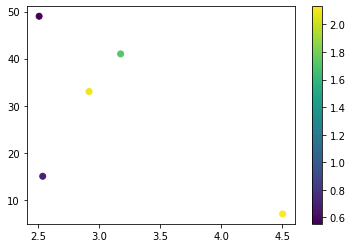

In [62]:
plt.scatter(x_dtr['MedInc'], x_dtr['HouseAge'], c=y_dtr)
plt.colorbar()

<AxesSubplot:xlabel='target', ylabel='Count'>

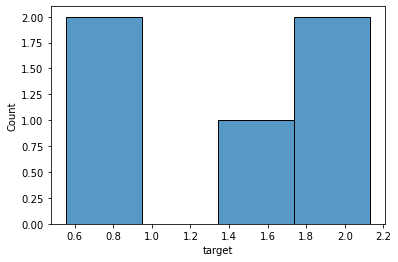

In [63]:
sns.histplot(x=y_dtr, data=df_train)

In [64]:
#決定木回帰、引数なし
dtr=DecisionTreeRegressor()
dtr.fit(x_dtr, y_dtr)

DecisionTreeRegressor()

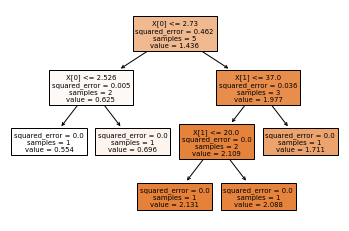

In [65]:
plot_tree(dtr, filled=True)
plt.show()

In [66]:
#listからMSEを算出する関数
def mse(a,b):
    m_left=np.mean(a)  #m_left:予測値
    m_right=np.mean(b)  #m_right:予測値
    left2=[]
    for i in a:
        left=np.mean(np.sum((i-m_left)**2))
        left2.append(left)
    right2=[]
    for j in b:
        right=np.mean(np.sum((j-m_right)**2))
        right2.append(right)
    return left2, np.mean(left2), right2, np.mean(right2), np.mean(left2)+ np.mean(right2)

In [67]:
#１番上のノードでのMSEの計算はxM,xHで場合分けする必要なし
#予測値もyの平均
a=[0.554,0.696,2.088,1.711,2.131]
b=[]
mse(a,b)

C:\Users\macch\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\macch\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


([0.7779239999999998,
  0.5476,
  0.42510400000000015,
  0.07562500000000007,
  0.48302499999999976],
 0.4618555999999999,
 [],
 nan,
 nan)

In [68]:
#xM=x[0]でソートしたときのMSE
a=[2.088,1.711]
b=[2.131]
mse(a,b)

([0.03553224999999996, 0.03553225000000004],
 0.03553225,
 [0.0],
 0.0,
 0.03553225)

In [69]:
#xH=x[1]でソートしたときのMSE
a=[2.131,2.088]
b=[1.711]
mse(a,b)

([0.0004622500000000032, 0.0004622499999999841],
 0.00046224999999999364,
 [0.0],
 0.0,
 0.00046224999999999364)

### 結果
・多変量の場合はx[0],x[1]でsortして個別にyのMSEを計算する。  
・全ての分割パターンでMSEを計算し、一番値が小さくなるものをそのノードでの分割パターンとする  
・計算結果は一致した

#### 特徴量重要度

In [70]:
#x['MedInc']の重要度
fi1=0.462*5-(0.005*2 + 0.036*3 + 0.005*2)

In [71]:
#x['HouseAge']の重要度
fi2=0.036*3-(0.000462*2)

In [72]:
#x['MedInc']の重要度
fi1/(fi1+fi2)

0.9532230472033256

In [73]:
#x['HouseAge']の重要度
fi2/(fi1+fi2)

0.046776952796674286

In [74]:
#特徴量重要度
dtr.feature_importances_

array([0.95375495, 0.04624505])

#### 結果 : 計算結果は完全には一致しなかったがほとんど同じ

## Q MedIncと住宅価格の相関係数は0.69ともともと高く、HouseAgeの相関係数は0.11と高くないが、相関係数が高い特徴量のほうが特徴量重要度も高くなる？偏相関係数？

In [75]:
cor=df_train.corr()
cor=cor.sort_values('target',ascending=False)
cor=cor.drop('target', axis=0)
cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.123116,0.318783,-0.057660,0.007757,0.024782,-0.075872,-0.018906,0.689709
AveRooms,0.318783,-0.147396,1.000000,0.855762,-0.072663,-0.003754,0.107317,-0.030133,0.151725
HouseAge,-0.123116,1.000000,-0.147396,-0.071153,-0.294908,0.015650,0.014164,-0.111221,0.106343
AveOccup,0.024782,0.015650,-0.003754,-0.005119,0.078874,1.000000,0.006550,-0.000712,-0.021252
Population,0.007757,-0.294908,-0.072663,-0.065841,1.000000,0.078874,-0.109246,0.101457,-0.026394
AveBedrms,-0.057660,-0.071153,0.855762,1.000000,-0.065841,-0.005119,0.069543,0.010735,-0.040228
Longitude,-0.018906,-0.111221,-0.030133,0.010735,0.101457,-0.000712,-0.925159,1.000000,-0.052883
Latitude,-0.075872,0.014164,0.107317,0.069543,-0.109246,0.006550,1.000000,-0.925159,-0.137310


In [76]:
dtr_2=DecisionTreeRegressor()
dtr_2.fit(df_train.loc[:,'MedInc':'Longitude'], df_train['target'])

DecisionTreeRegressor()

In [77]:
dtr_2.feature_importances_

array([0.51118907, 0.05092238, 0.02822501, 0.027072  , 0.02785829,
       0.13988423, 0.1078395 , 0.10700951])

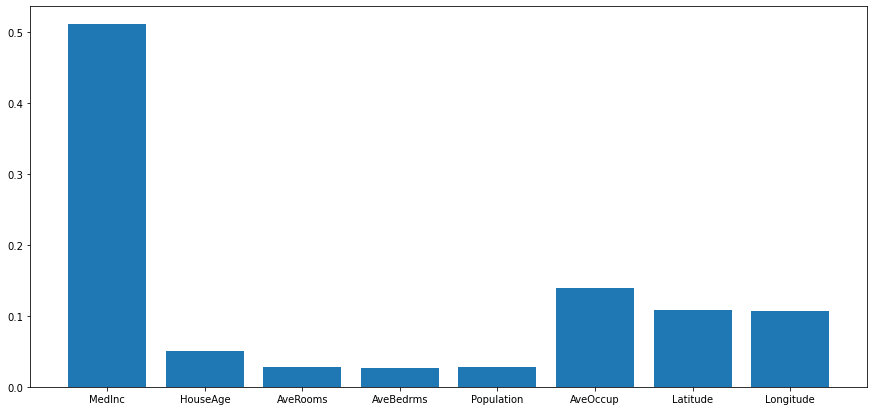

In [78]:
plt.figure(figsize=(15,7))
plt.bar(range(8), dtr_2.feature_importances_, tick_label=df_train.loc[:,'MedInc':'Longitude'].columns)
plt.show()

### AveOccupの相関係数は-0.021(最小値)に対して特徴量重要度は0.141(2番目)なのはなぜ？

### LongitudeとLatitudeが負の相関（ρ＝-0.93）だったのでどちらか片一方を排除して線形回帰  
評価指標はRMSE  
10分割交差検証

In [79]:
#Longitudeを削除して新しいdf2を作成
df2_lati = df2.drop(['Longitude','target'], axis=1)

In [80]:
#標準化
ss3=StandardScaler()
df2_lati_std = ss3.fit_transform(df2_lati)

In [81]:
LR5=LinearRegression()
scores2=cross_val_score(LR5, df2_lati_std, df2['target'], scoring='neg_mean_squared_error', cv=10)
print('RMSE_Longitudeを削除',np.mean(np.sqrt(-scores2)))

RMSE_Longitudeを削除 0.7834347496811289


#### 全特徴量はそのままでクロスバリデーション

In [82]:
ss=StandardScaler()
df2_std = ss.fit_transform(df2.drop('target', axis=1))
df2_std.shape

(20640, 8)

In [83]:
%%time
LR6=LinearRegression()
scores3=cross_val_score(LR6, df2_std, df2['target'], scoring='neg_mean_squared_error', cv=10)
np.mean(np.sqrt(-scores3))

Wall time: 152 ms


0.726980512661084

In [84]:
#Latitudeを削除して新しいdf2を作成
df2_long = df2.drop(['Latitude','target'],  axis=1)
df2_long

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,2.1797,26.0,5.617284,1.154321,1001.0,3.089506,-116.68
1,4.5461,16.0,7.723288,1.312329,1068.0,2.926027,-120.30
2,3.6587,32.0,5.524038,0.899038,499.0,2.399038,-123.22
3,4.8583,28.0,5.983333,0.970370,1665.0,3.083333,-119.19
4,3.6591,36.0,5.207739,1.099796,1556.0,3.169043,-118.40
...,...,...,...,...,...,...,...
20635,3.0729,37.0,5.396491,1.045614,867.0,3.042105,-117.09
20636,3.2750,39.0,5.176056,1.098592,1047.0,3.686620,-118.35
20637,2.9402,33.0,5.550617,1.071605,1461.0,3.607407,-118.99
20638,5.1878,10.0,6.799043,0.976077,657.0,3.143541,-121.33


In [85]:
ss4=StandardScaler()
df2_long_std = ss4.fit_transform(df2_long)

In [86]:
%%time
LR7=LinearRegression()
scores4=cross_val_score(LR7, df2_long_std, df2['target'], scoring='neg_mean_squared_error', cv=10)
print('RMSE_Latitudeを削除',np.mean(np.sqrt(-scores4)))

RMSE_Latitudeを削除 0.7852698301261432
Wall time: 158 ms


### 結果
特徴量はそのままの時のRMSE：0.726980512661084  
Longitudeを削除： 0.7834347496811289  
Latitudeを削除 ：0.7852698301261432  
⇒相関が高い２変数のうちどちらか一方を減らしてもRMSEが改善するわけではなさそう